In [1]:
import SRRS

In [2]:
from SRRS import plotting,metrics,vignette,simulate,scoring
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Arc

sample = vignette.m1s1_large_hdf5()
cells = [c for c in sample.cells() if c.n > 500]
len(cells)

44

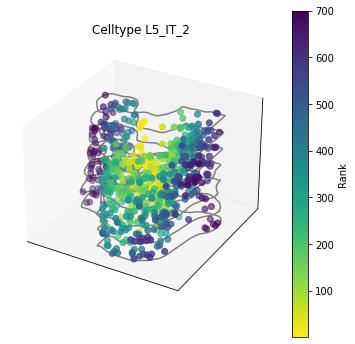

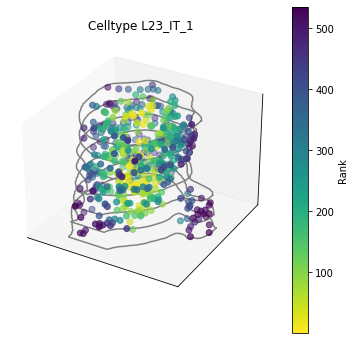

In [27]:
#testing the new central metric
rank_f = metrics.central
cells = list(map(rank_f,cells))
num_plots = 2

for i,cell in enumerate(cells):
    plotting.plot_cell_3D(cell, color_by_rank=True)
    plt.show()
    plt.close()
    
    if i >= num_plots-1:
        break

In [3]:
rank_f = metrics._peripheral_dist_and_rank
cells = list(map(rank_f,cells))
len(cells)

44

In [4]:
df = pd.DataFrame()

for c in cells:
    min_v = None
    max_v = None
    genes = []
    values = []
    for z in c.zslices:
        for g,v in zip(c.spot_genes[z],c.spot_values[z]):
            if not min_v or v < min_v:
                min_v = v
            if not max_v or v > max_v:
                max_v = v
            
            genes.append(g)
            values.append(v)
    
    norm_values = (max_v-np.array(values))/(max_v-min_v)
    cell_df = pd.DataFrame({
        'cell':c.cell_id,
        'ontology':c.annotation,
        'gene':genes,
        'value':norm_values,
    })
    df = pd.concat((df,cell_df))
    
df

,cell,ontology,gene,value
0,103963394979214788325793179983943807873,L5_IT_2,Nr4a1,0.872322
1,103963394979214788325793179983943807873,L5_IT_2,Fst,0.790730
2,103963394979214788325793179983943807873,L5_IT_2,Egln3,0.758531
3,103963394979214788325793179983943807873,L5_IT_2,Syndig1,0.869242
4,103963394979214788325793179983943807873,L5_IT_2,Satb2,0.959194
...,...,...,...,...
575,99310474131739966831110248192079896073,L23_IT_2,Wipf3,0.485269
576,99310474131739966831110248192079896073,L23_IT_2,Wipf3,0.427501
577,99310474131739966831110248192079896073,L23_IT_2,Wipf3,0.370466
578,99310474131739966831110248192079896073,L23_IT_2,Wipf3,0.690634


In [5]:
filt_df = df.groupby(['ontology','gene']).filter(lambda g: len(g) > 100)
filt_df

,cell,ontology,gene,value
20,103963394979214788325793179983943807873,L5_IT_2,Slc30a3,0.490021
27,103963394979214788325793179983943807873,L5_IT_2,Slc30a3,0.795621
32,103963394979214788325793179983943807873,L5_IT_2,Slc30a3,0.931900
55,103963394979214788325793179983943807873,L5_IT_2,Slc30a3,0.761560
85,103963394979214788325793179983943807873,L5_IT_2,Slc30a3,0.845162
...,...,...,...,...
724,98094925393968329130254909503130262661,L5_IT_2,Slc30a3,0.273235
732,98094925393968329130254909503130262661,L5_IT_2,Slc30a3,0.613069
755,98094925393968329130254909503130262661,L5_IT_2,Slc30a3,0.736649
767,98094925393968329130254909503130262661,L5_IT_2,Slc30a3,0.444041


In [6]:
filt_df['gene'].value_counts()

Slc30a3     1824
Sulf2       1207
Satb2        649
Ptprt        511
Rorb         480
Wipf3        451
C1ql3        402
Ptprk        352
Col25a1      347
Wnt7b        316
Pou3f3       313
Reln         309
Slc32a1      296
Cux2         282
Grin3a       233
Camk2d       164
Cxcl14       152
Marcksl1     148
Rgs6         143
Parm1        142
Elfn1        134
Npnt         128
Prdm8        117
Cdh13        115
Cbln2        112
Sertm1       111
Syndig1      107
Name: gene, dtype: int64

In [7]:
filt_df.groupby('gene')['value'].median().sort_values()

gene
Sertm1      0.596249
Ptprk       0.612967
Elfn1       0.621150
Pou3f3      0.622261
Cux2        0.635374
Slc32a1     0.636884
Wipf3       0.642593
Npnt        0.643771
Cbln2       0.646406
Col25a1     0.656476
Slc30a3     0.661154
Reln        0.665871
Parm1       0.667973
Grin3a      0.680656
Rorb        0.683665
Prdm8       0.686520
Sulf2       0.686553
Cxcl14      0.693239
Ptprt       0.694944
Satb2       0.699703
Camk2d      0.705571
Cdh13       0.709492
C1ql3       0.714143
Marcksl1    0.714754
Wnt7b       0.716847
Rgs6        0.716987
Syndig1     0.718325
Name: value, dtype: float64

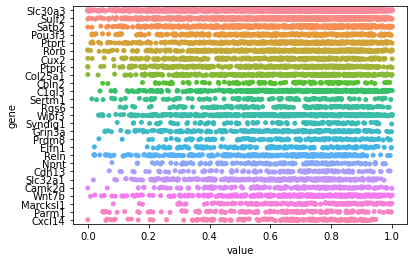

In [8]:
sns.stripplot(
    x = 'value',
    y = 'gene',
    data = filt_df,
)
plt.show()
plt.close()

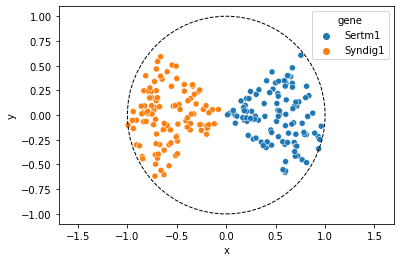

In [9]:
#Assigning random angles for two separate genes for plotting
plot_df = filt_df[filt_df['gene'].isin(['Sertm1','Syndig1'])]

plot_df.loc[plot_df['gene'].eq('Sertm1'),'angle'] = (
    np.random.uniform(-np.pi/4,np.pi/4,plot_df['gene'].eq('Sertm1').sum())
)
plot_df.loc[plot_df['gene'].eq('Syndig1'),'angle'] = (
    np.random.uniform(3*np.pi/4,5*np.pi/4,plot_df['gene'].eq('Syndig1').sum())
)
plot_df['x'] = plot_df['angle'].apply(np.cos).multiply(plot_df['value'])
plot_df['y'] = plot_df['angle'].apply(np.sin).multiply(plot_df['value'])

ax = sns.scatterplot(
    x = 'x',
    y = 'y',
    hue = 'gene',
    data = plot_df,
)
plt.xlim([-1,1])
plt.ylim([-1,1])
circ = plt.Circle((0, 0), 1, facecolor='none', edgecolor='k', linestyle='dashed')
ax.add_patch(circ)
#plt.plot([0,0],[-1,1],'k--')
plt.axis('equal')
plt.show()
plt.close()

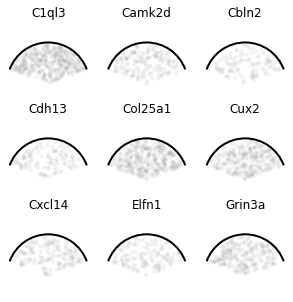

In [10]:
def hemisphere_plot(plot_df,ax,theta1=0,theta2=180):
    plot_df['angle'] = np.random.uniform(theta1/180*np.pi,theta2/180*np.pi,len(plot_df))
    plot_df['x'] = plot_df['angle'].apply(np.cos).multiply(plot_df['value'])
    plot_df['y'] = plot_df['angle'].apply(np.sin).multiply(plot_df['value'])

    ax = sns.scatterplot(
        x = 'x',
        y = 'y',
        color = 'grey',
        size = 1,
        alpha = max(0.1,1/len(plot_df)),
        data = plot_df,
        ax = ax,
        legend = None,
    )
    arc = Arc(
        xy=(0, 0),
        width=2, height=2,
        angle=0, theta1=theta1, theta2=theta2,
        linewidth=2,
        facecolor='none', edgecolor='k', linestyle='solid',
    )
    ax.add_patch(arc)
    ax.axis('equal')
    ax.set_xlim([-1,1])
    ax.set_ylim([0,1])
    ax.axis('off')
    return ax
    
    
ncol,nrow = 3,3
fig,axs = plt.subplots(ncol,nrow,figsize=(5,5))
axs = axs.flatten()

for i,(gene,g) in enumerate(filt_df.groupby('gene')):
    if i+1 > ncol*nrow:
        break
        
    ax = hemisphere_plot(g,axs[i],theta1=20,theta2=160)
    ax.set_title(gene)

plt.show()
plt.close()

In [11]:
filt_df['value'].median()

0.6738227297706771

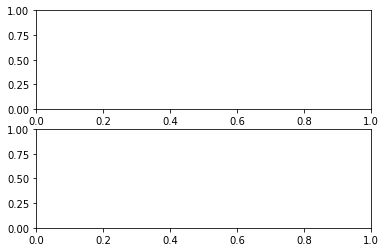

In [12]:
fig,axs = plt.subplots(2,1)

In [13]:
ax.axis

<bound method _AxesBase.axis of <AxesSubplot:title={'center':'Grin3a'}, xlabel='x', ylabel='y'>>

In [14]:
plt.plot?

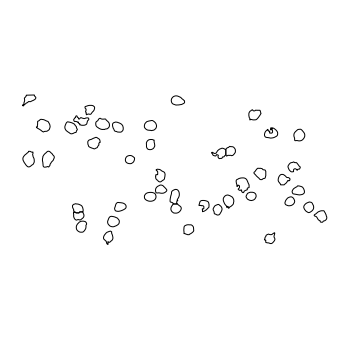

In [15]:
fig = plotting.plot_tissue_level(cells)

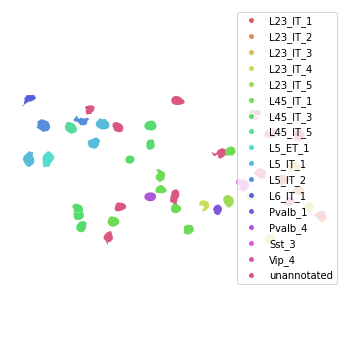

In [16]:
fig = plotting.plot_tissue_level(cells, color_by_ontology=True)

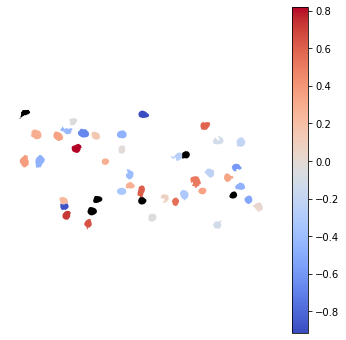

In [17]:
scored_cells = list(scoring._iter_scores(cells, 'peripheral'))
fig = plotting.plot_tissue_level(scored_cells, color_by_score_gene='Acta2')

Before permuting C1ql3=534.0 Pou6f2=804.0


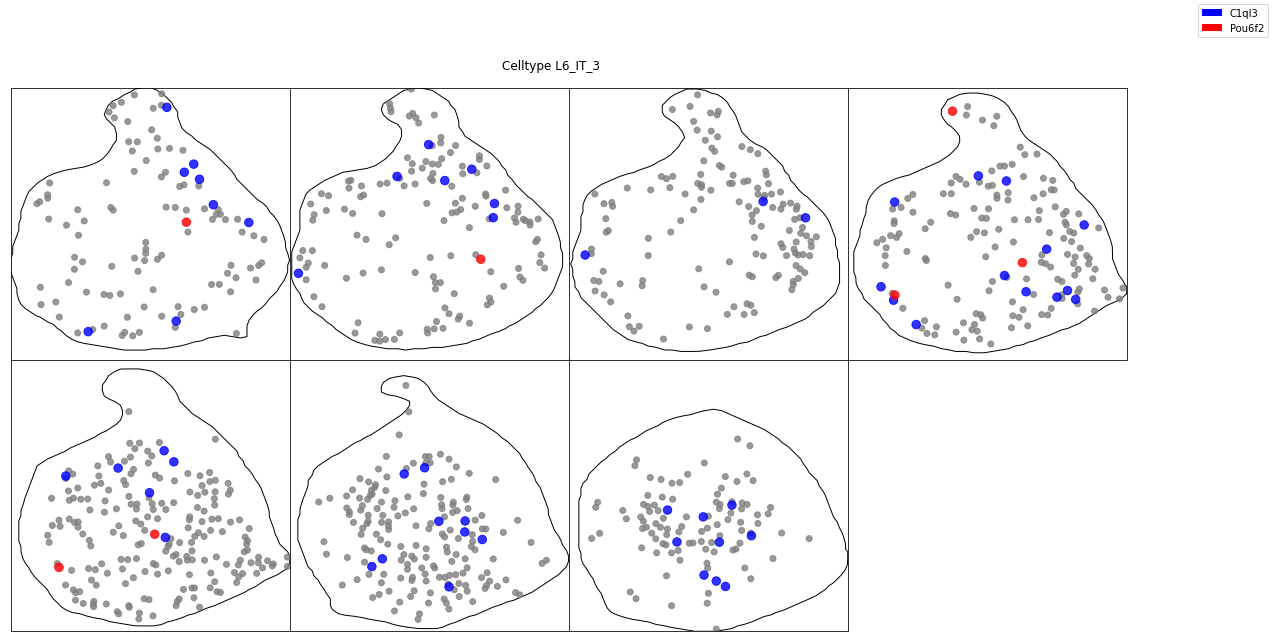

In [18]:
from SRRS import plotting,metrics,vignette,simulate
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sample = vignette.m1s4_hdf5()
cells = sample.cells()

cell = cells[0]
cell = metrics.peripheral(cell)

genes = ['C1ql3','Pou6f2']
colors = ['blue','red']
gene_colors = {g:c for g,c in zip(genes,colors)}
gene_meds = ' '.join(['{}={}'.format(g,cell.gene_med_ranks[g]) for g in genes])

print('Before permuting '+gene_meds)
fig = plotting.plot_cell_zslices(cell,gene_colors=gene_colors)


In [19]:
simulate.exp_permute_gene_labels(cell,metric='peripheral')

Cell-100042292675978612289781789372249900646-L6_IT_3

After permuting C1ql3=438.0 Pou6f2=599.0


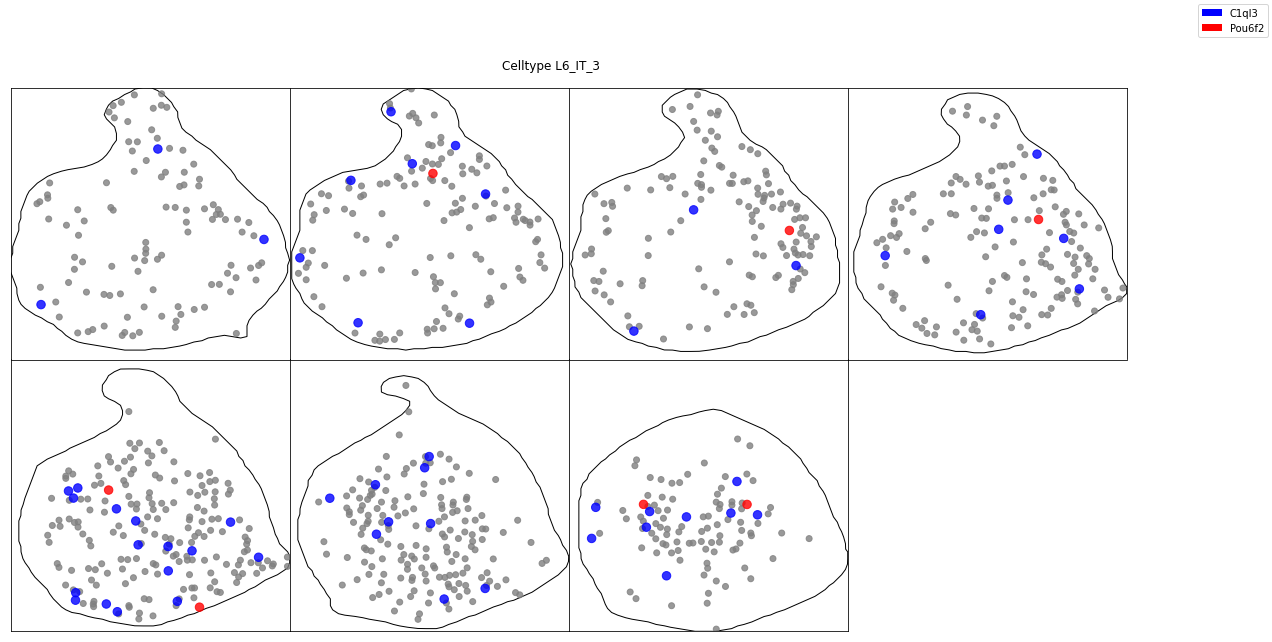

In [20]:
import importlib
importlib.reload(simulate)
gene_ks={
    'C1ql3':1, #biased towards smaller ranks
}

cell = simulate.exp_permute_gene_labels(
    cell,
    metric='peripheral',
    gene_ks=gene_ks,
)
gene_meds = ' '.join(['{}={}'.format(g,cell.gene_med_ranks[g]) for g in genes])

print('After permuting '+gene_meds)
fig = plotting.plot_cell_zslices(cell,gene_colors=gene_colors)

In [21]:
cell.n

1015

In [22]:
ks = [0.04,0.2,1,5,50]
num_its = 100
med_ranks = {}

for k in ks:
    
    gene_ks={
        'C1ql3':k, #biased towards smaller ranks
    }
    
    med_ranks[k] = []

    for it in range(num_its):

        cell = simulate.lin_permute_gene_labels(
            cell,
            metric='peripheral',
            gene_ks=gene_ks,
        )
        med_ranks[k].append(cell.gene_med_ranks['C1ql3'])

med_ranks

{0.04: [655.0,
  627.0,
  723.0,
  665.0,
  745.0,
  758.0,
  722.0,
  694.0,
  634.0,
  584.0,
  728.0,
  658.0,
  680.0,
  739.0,
  745.0,
  684.0,
  738.0,
  703.0,
  659.0,
  673.0,
  755.0,
  649.0,
  669.0,
  721.0,
  732.0,
  687.0,
  689.0,
  727.0,
  635.0,
  633.0,
  697.0,
  658.0,
  650.0,
  571.0,
  708.0,
  744.0,
  712.0,
  638.0,
  823.0,
  628.0,
  593.0,
  660.0,
  742.0,
  716.0,
  701.0,
  692.0,
  677.0,
  818.0,
  632.0,
  756.0,
  672.0,
  658.0,
  646.0,
  791.0,
  599.0,
  722.0,
  711.0,
  690.0,
  706.0,
  734.0,
  709.0,
  767.0,
  724.0,
  759.0,
  661.0,
  711.0,
  544.0,
  691.0,
  687.0,
  727.0,
  687.0,
  578.0,
  606.0,
  623.0,
  723.0,
  632.0,
  678.0,
  609.0,
  719.0,
  684.0,
  626.0,
  648.0,
  614.0,
  633.0,
  654.0,
  714.0,
  751.0,
  667.0,
  648.0,
  677.0,
  702.0,
  677.0,
  761.0,
  578.0,
  688.0,
  673.0,
  671.0,
  690.0,
  699.0,
  716.0],
 0.2: [677.0,
  701.0,
  630.0,
  618.0,
  507.0,
  687.0,
  618.0,
  630.0,
  710.0,
  674.0

In [23]:
ks = [-1,-0.5,0,0.5,1]
num_its = 100
med_ranks = {}

for k in ks:
    
    gene_ks={
        'C1ql3':k, #biased towards smaller ranks
    }
    
    med_ranks[k] = []

    for it in range(num_its):

        cell = simulate.exp_permute_gene_labels(
            cell,
            metric='peripheral',
            gene_ks=gene_ks,
        )
        med_ranks[k].append(cell.gene_med_ranks['C1ql3'])

med_ranks

{-1: [531.0,
  605.0,
  572.0,
  557.0,
  737.0,
  550.0,
  684.0,
  715.0,
  640.0,
  619.0,
  637.0,
  623.0,
  637.0,
  645.0,
  669.0,
  648.0,
  682.0,
  654.0,
  606.0,
  555.0,
  676.0,
  716.0,
  664.0,
  622.0,
  594.0,
  679.0,
  634.0,
  694.0,
  689.0,
  589.0,
  663.0,
  594.0,
  626.0,
  723.0,
  703.0,
  627.0,
  632.0,
  649.0,
  628.0,
  647.0,
  673.0,
  582.0,
  549.0,
  562.0,
  525.0,
  544.0,
  627.0,
  476.0,
  709.0,
  655.0,
  661.0,
  664.0,
  559.0,
  650.0,
  619.0,
  575.0,
  643.0,
  636.0,
  705.0,
  592.0,
  552.0,
  583.0,
  488.0,
  592.0,
  696.0,
  615.0,
  643.0,
  507.0,
  526.0,
  661.0,
  610.0,
  577.0,
  700.0,
  610.0,
  550.0,
  594.0,
  660.0,
  530.0,
  502.0,
  546.0,
  685.0,
  629.0,
  727.0,
  598.0,
  653.0,
  620.0,
  701.0,
  649.0,
  527.0,
  583.0,
  558.0,
  696.0,
  576.0,
  570.0,
  630.0,
  533.0,
  570.0,
  635.0,
  590.0,
  571.0],
 -0.5: [582.0,
  442.0,
  564.0,
  631.0,
  632.0,
  645.0,
  623.0,
  527.0,
  565.0,
  620.0,

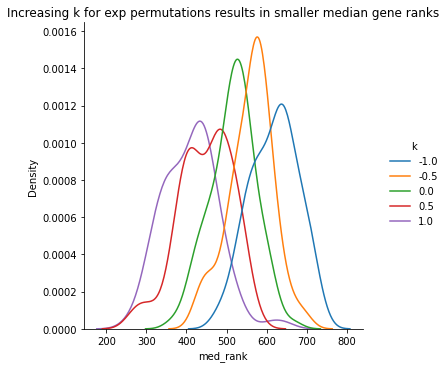

In [24]:
plot_df = pd.DataFrame(med_ranks)
plot_df = plot_df.melt(var_name='k',value_name='med_rank')
plot_df['k'] = plot_df['k'].astype(str)

sns.displot(
    x = 'med_rank',
    hue = 'k',
    kind = 'kde',
    data = plot_df,
)
plt.title('Increasing k for exp permutations results in smaller median gene ranks')
plt.show()
plt.close()